#  Project Title: CIFAR10 Image Classification
## 1. Business Understanding
#### Goal:
- Train and compare CNN models on CIFAR10 (colored) dataset ot classify multi-category images

## Step 1: Data Understanding


#### Step I: Imports and setup

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

2025-10-16 16:15:04.537935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760631304.974833      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760631305.098669      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


#### Step II: Load and Preprocess datasets

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
CIFAR10 Shape: (50000, 32, 32, 3)


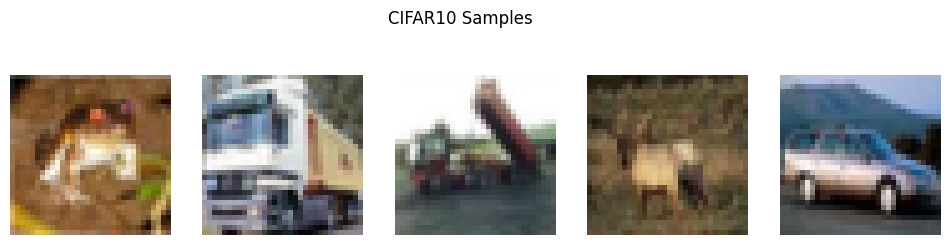

In [2]:
# Load datasets
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Basic info
print(f"CIFAR10 Shape: {x_train.shape}")

# Visual check
fig, axs = plt.subplots(1,5, figsize=(12,3))
for i in range(5):
    axs[i].imshow(x_train[i])
    axs[i].axis('off')
plt.suptitle('CIFAR10 Samples')
plt.show()

## Step 2: Data Preparation

In [3]:
# Normalize and add data augmentation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize 
x_train,x_test = x_train/255.0, x_test/255.0

# Augmentation for cifar10 for more complexity
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=.1,
    height_shift_range=.1,
    horizontal_flip=True
)

# Prepare the data generators
train_cifar = datagen.flow(x_train, y_train, batch_size=64)

##  Step 3: Modeling(CRISP-DM ++ FunctionalAPI style)

### Step I: Define Model Function

In [4]:
def build_cnn(input_shape,num_classes=10):
    inputs = tf.keras.Input(shape=input_shape)

    # Layer 1
    x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    # Layer 2
    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    # Layer 3
    x = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(.4)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    return tf.keras.Model(inputs, outputs, name='cnn_base_model')

model = build_cnn((32,32,3))

I0000 00:00:1760631329.721656      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1760631329.722287      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


#### Step II: Compile model

In [5]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "cnn_base_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,434 (372.79 KB)

 Trainable params: 94,986 (371.04 KB)

 Non-trainable params: 448 (1.75 KB)

## Step 4: Evaluation

#### Step I: Fit the Model

In [7]:
history = model.fit(x_train, y_train,epochs=10, validation_split=.1, verbose=2,validation_data=(x_test,y_test))

Epoch 1/10


I0000 00:00:1760631336.891740     101 service.cc:148] XLA service 0x3d913c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760631336.893221     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760631336.893242     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760631337.358360     101 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1760631341.254065     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 - 17s - 11ms/step - accuracy: 0.5133 - loss: 1.3620 - val_accuracy: 0.4522 - val_loss: 1.4774
Epoch 2/10
1563/1563 - 5s - 3ms/step - accuracy: 0.6295 - loss: 1.0550 - val_accuracy: 0.5097 - val_loss: 1.4623
Epoch 3/10
1563/1563 - 5s - 3ms/step - accuracy: 0.6729 - loss: 0.9378 - val_accuracy: 0.6327 - val_loss: 1.0133
Epoch 4/10
1563/1563 - 5s - 3ms/step - accuracy: 0.7010 - loss: 0.8610 - val_accuracy: 0.5688 - val_loss: 1.3010
Epoch 5/10
1563/1563 - 5s - 3ms/step - accuracy: 0.7248 - loss: 0.7998 - val_accuracy: 0.6702 - val_loss: 0.9612
Epoch 6/10
1563/1563 - 5s - 3ms/step - accuracy: 0.7395 - loss: 0.7577 - val_accuracy: 0.7258 - val_loss: 0.7870
Epoch 7/10
1563/1563 - 5s - 3ms/step - accuracy: 0.7527 - loss: 0.7157 - val_accuracy: 0.7391 - val_loss: 0.7405
Epoch 8/10
1563/1563 - 5s - 3ms/step - accuracy: 0.7622 - loss: 0.6861 - val_accuracy: 0.7324 - val_loss: 0.7548
Epoch 9/10
1563/1563 - 5s - 3ms/step - accuracy: 0.7718 - loss: 0.6590 - val_accuracy: 0.7620 - val_loss:

#### Step II: Visualize

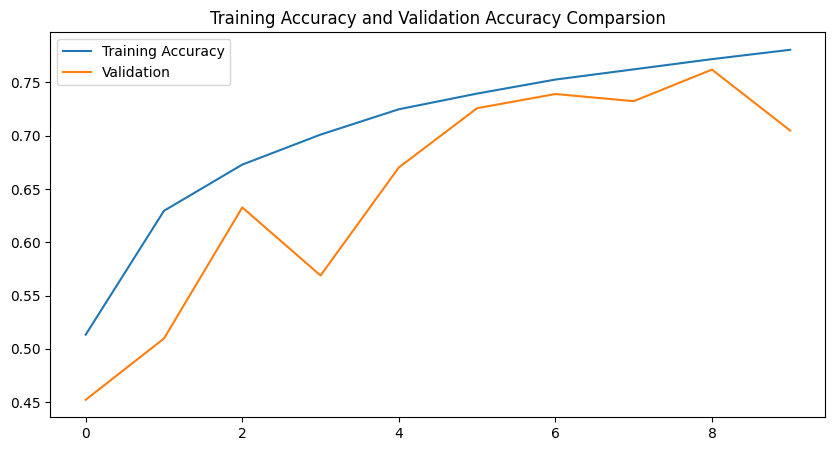

In [8]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.title('Training Accuracy and Validation Accuracy Comparsion')
plt.legend()
plt.show()